In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import matplotlib.patches as mpatches
%matplotlib inline

In [3]:
#第一大题
earthquake = pd.read_csv('usgs_earthquakes.csv')

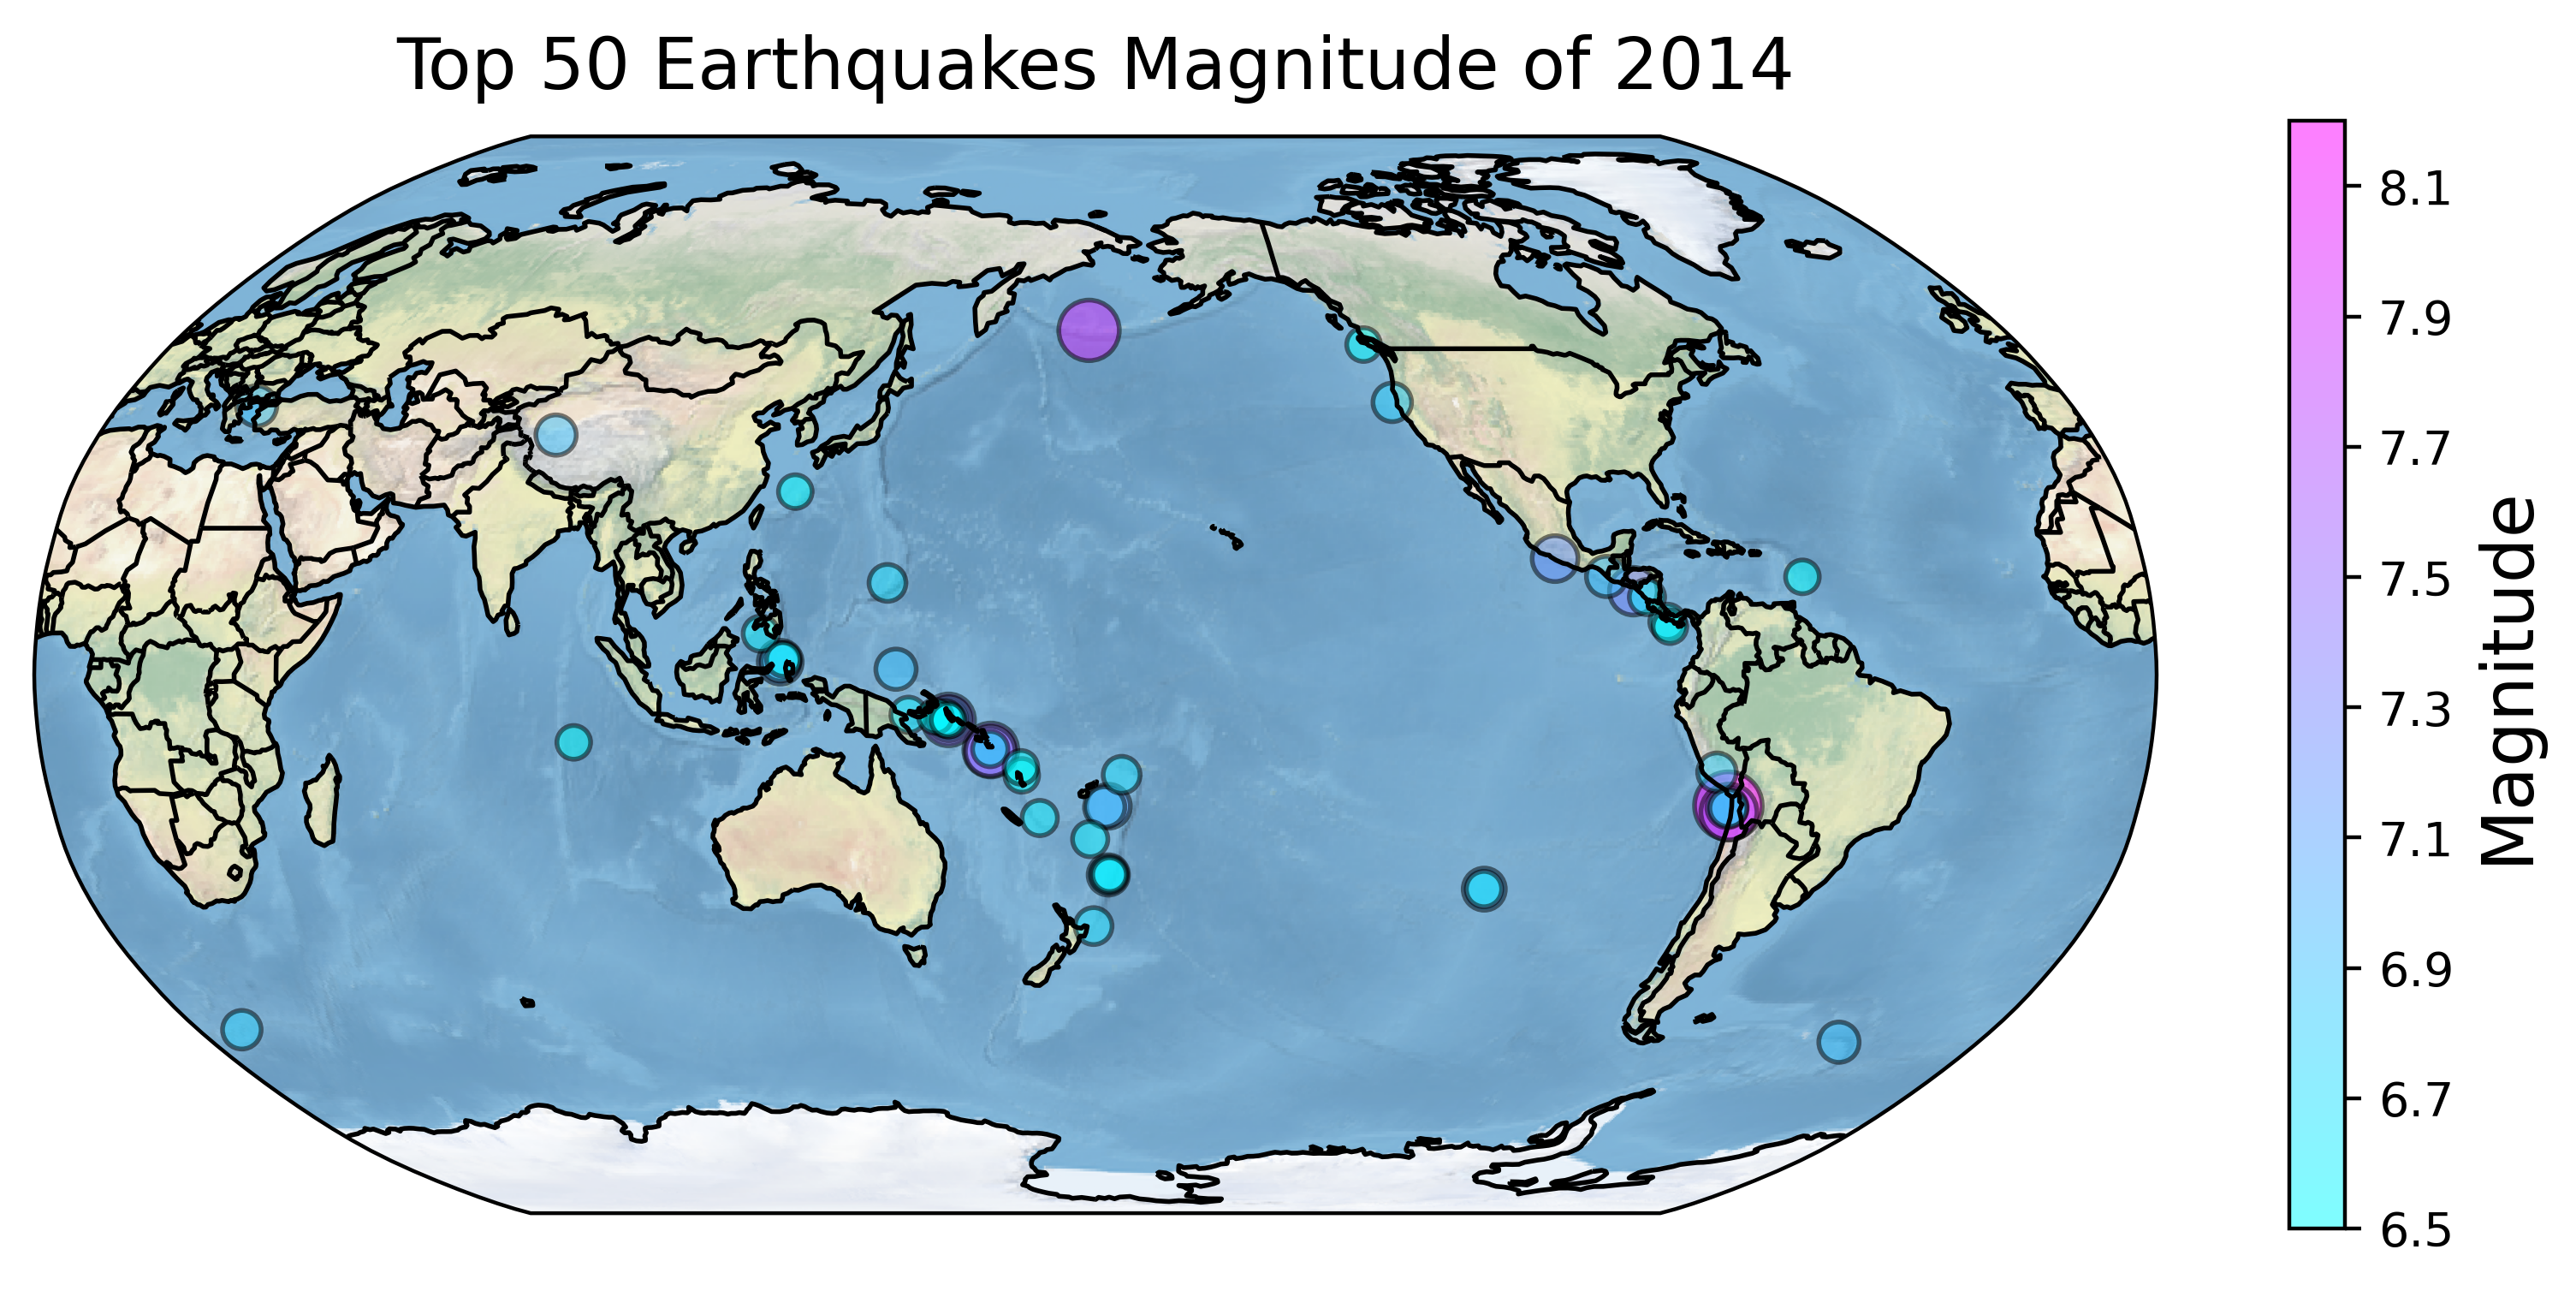

In [4]:
#读取文件
earthquake = pd.read_csv('usgs_earthquakes.csv')

#选取前50的地震
earthquake = earthquake[earthquake['mag'] > 0].sort_values(by='mag', ascending=False).head(50)

#创建画布和子图，并设置180度为中心经度
fig = plt.figure(figsize=(10, 6), dpi=400)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

#添加低分辨背景
ax.stock_img()

#添加地图特征
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

#画地震散点图，根据震级大小来设置散点大小
sc = ax.scatter(earthquake['longitude'], earthquake['latitude'], s=pow(earthquake['mag'],6)/1500, c=earthquake['mag'], cmap='cool', alpha=0.5, transform=ccrs.PlateCarree(),edgecolor='black')

#设置标题
ax.set_title('Top 50 Earthquakes Magnitude of 2014', fontsize=15, pad=10, color='black')

#添加colorbar
cbar = fig.colorbar(sc, ax=ax, shrink=0.7, label='Magnitude')

#设置colobar格式
cbar.set_label('Magnitude', fontsize=15)
cbar.set_ticks(np.arange(6.5, 8.2, 0.2))
cbar.ax.tick_params(labelsize=10)
plt.show()



In [7]:
#第二大题
glacier_data = xr.open_dataset('glacier_dataset.nc4',engine='netcdf4')

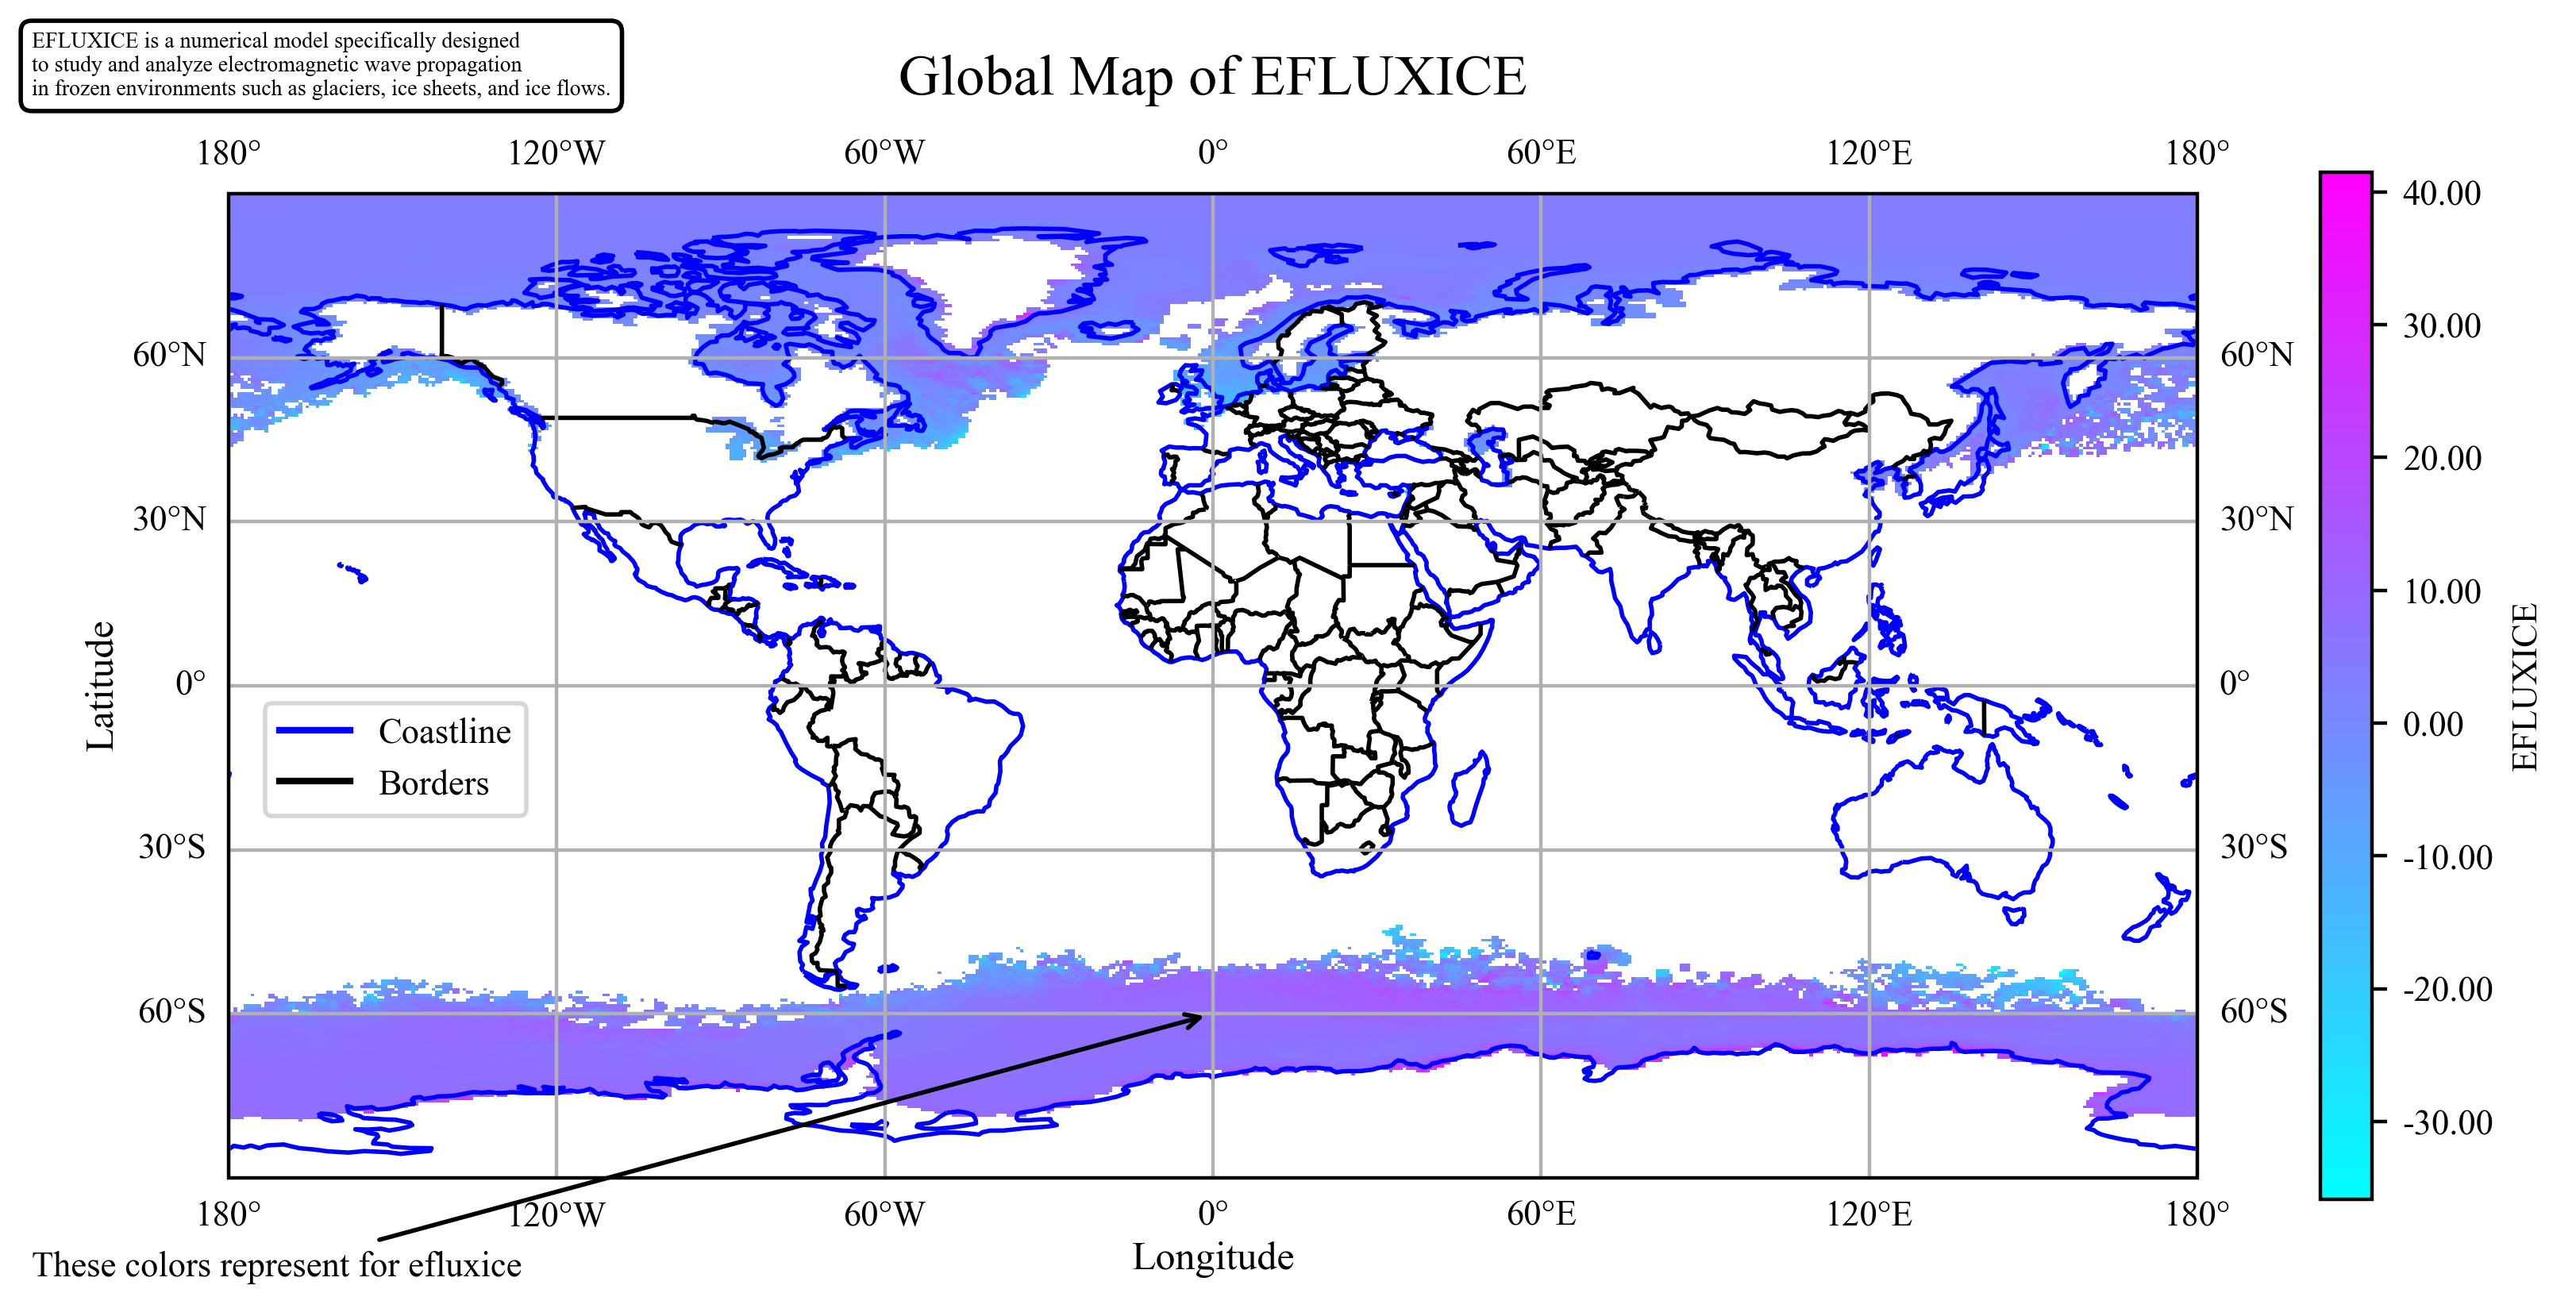

In [8]:
#2.1
#选择EFLUXICE变量
efluxice = glacier_data['EFLUXICE'].mean(dim='time')

#创建画布和子图
fig = plt.figure(figsize=(10, 6), dpi=400)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#画图，运用pcolormesh函数（从matplotlib网站学习，特别适合画经纬度的图）
global_map = ax.pcolormesh(efluxice['lon'], efluxice['lat'], efluxice, transform=ccrs.PlateCarree(), cmap='cool')

#添加地图特征
coastline = ax.add_feature(cfeature.COASTLINE, edgecolor='blue',label='coastline')
borders = ax.add_feature(cfeature.BORDERS, edgecolor='black',label='borders')

#添加网格线和刻度
gl = ax.gridlines(draw_labels=True)
gl.xlabel_style = {'size': 8, 'fontname': 'Times New Roman'}
gl.ylabel_style = {'size': 8, 'fontname': 'Times New Roman'}

#设置坐标轴标题，因为cartopy没有自带坐标轴标题，所以要通过text函数来添加
ax.text(0, -105, 'Longitude', ha='center', va='center', fontsize=9, fontname='Times New Roman')
ax.text(-203, 0, 'Latitude', ha='center', va='center', rotation='vertical', fontsize=9, fontname='Times New Roman')

#设置标题
ax.set_title('Global Map of EFLUXICE', fontsize=13,fontname='Times New Roman',pad=10)

#添加colorbar
cbar = fig.colorbar(global_map, ax=ax, shrink=0.7,pad=0.05)
cbar.set_label('EFLUXICE', fontsize=8, fontname='Times New Roman')

#设置 colorbar 的刻度标签的字体大小和字体样式，根据报错：UserWarning: FixedFormatter should only be used together with FixedLocator学习
locations = cbar.ax.get_yticks()
cbar.ax.yaxis.set_major_locator(plt.FixedLocator(locations))
cbar.ax.set_yticklabels([f'{tick:.2f}' for tick in locations], fontsize=8, fontname='Times New Roman')

#添加注释和文本框
ax.annotate('These colors represent for efluxice', xy=(0, -60), xytext=(-0.1, -0.1), textcoords='axes fraction', arrowprops=dict(arrowstyle='->'), fontsize=8, fontname='Times New Roman')
ax.text(-0.1, 1.1, 'EFLUXICE is a numerical model specifically designed\nto study and analyze electromagnetic wave propagation\nin frozen environments such as glaciers, ice sheets, and ice flows.', transform=ax.transAxes, fontsize=5, fontname='Times New Roman',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#为地图特征添加图例，因为cartopy没有自带图例，所以要通过用matplotlib创建两个不显示的颜色线的函数来创建图例
plt.plot([], [], color='blue', label='Coastline')
plt.plot([], [], color='black', label='Borders')
plt.legend(loc='lower right', prop={'size': 8, 'family': 'Times New Roman'},bbox_to_anchor=(0.16, 0.35))

plt.show()



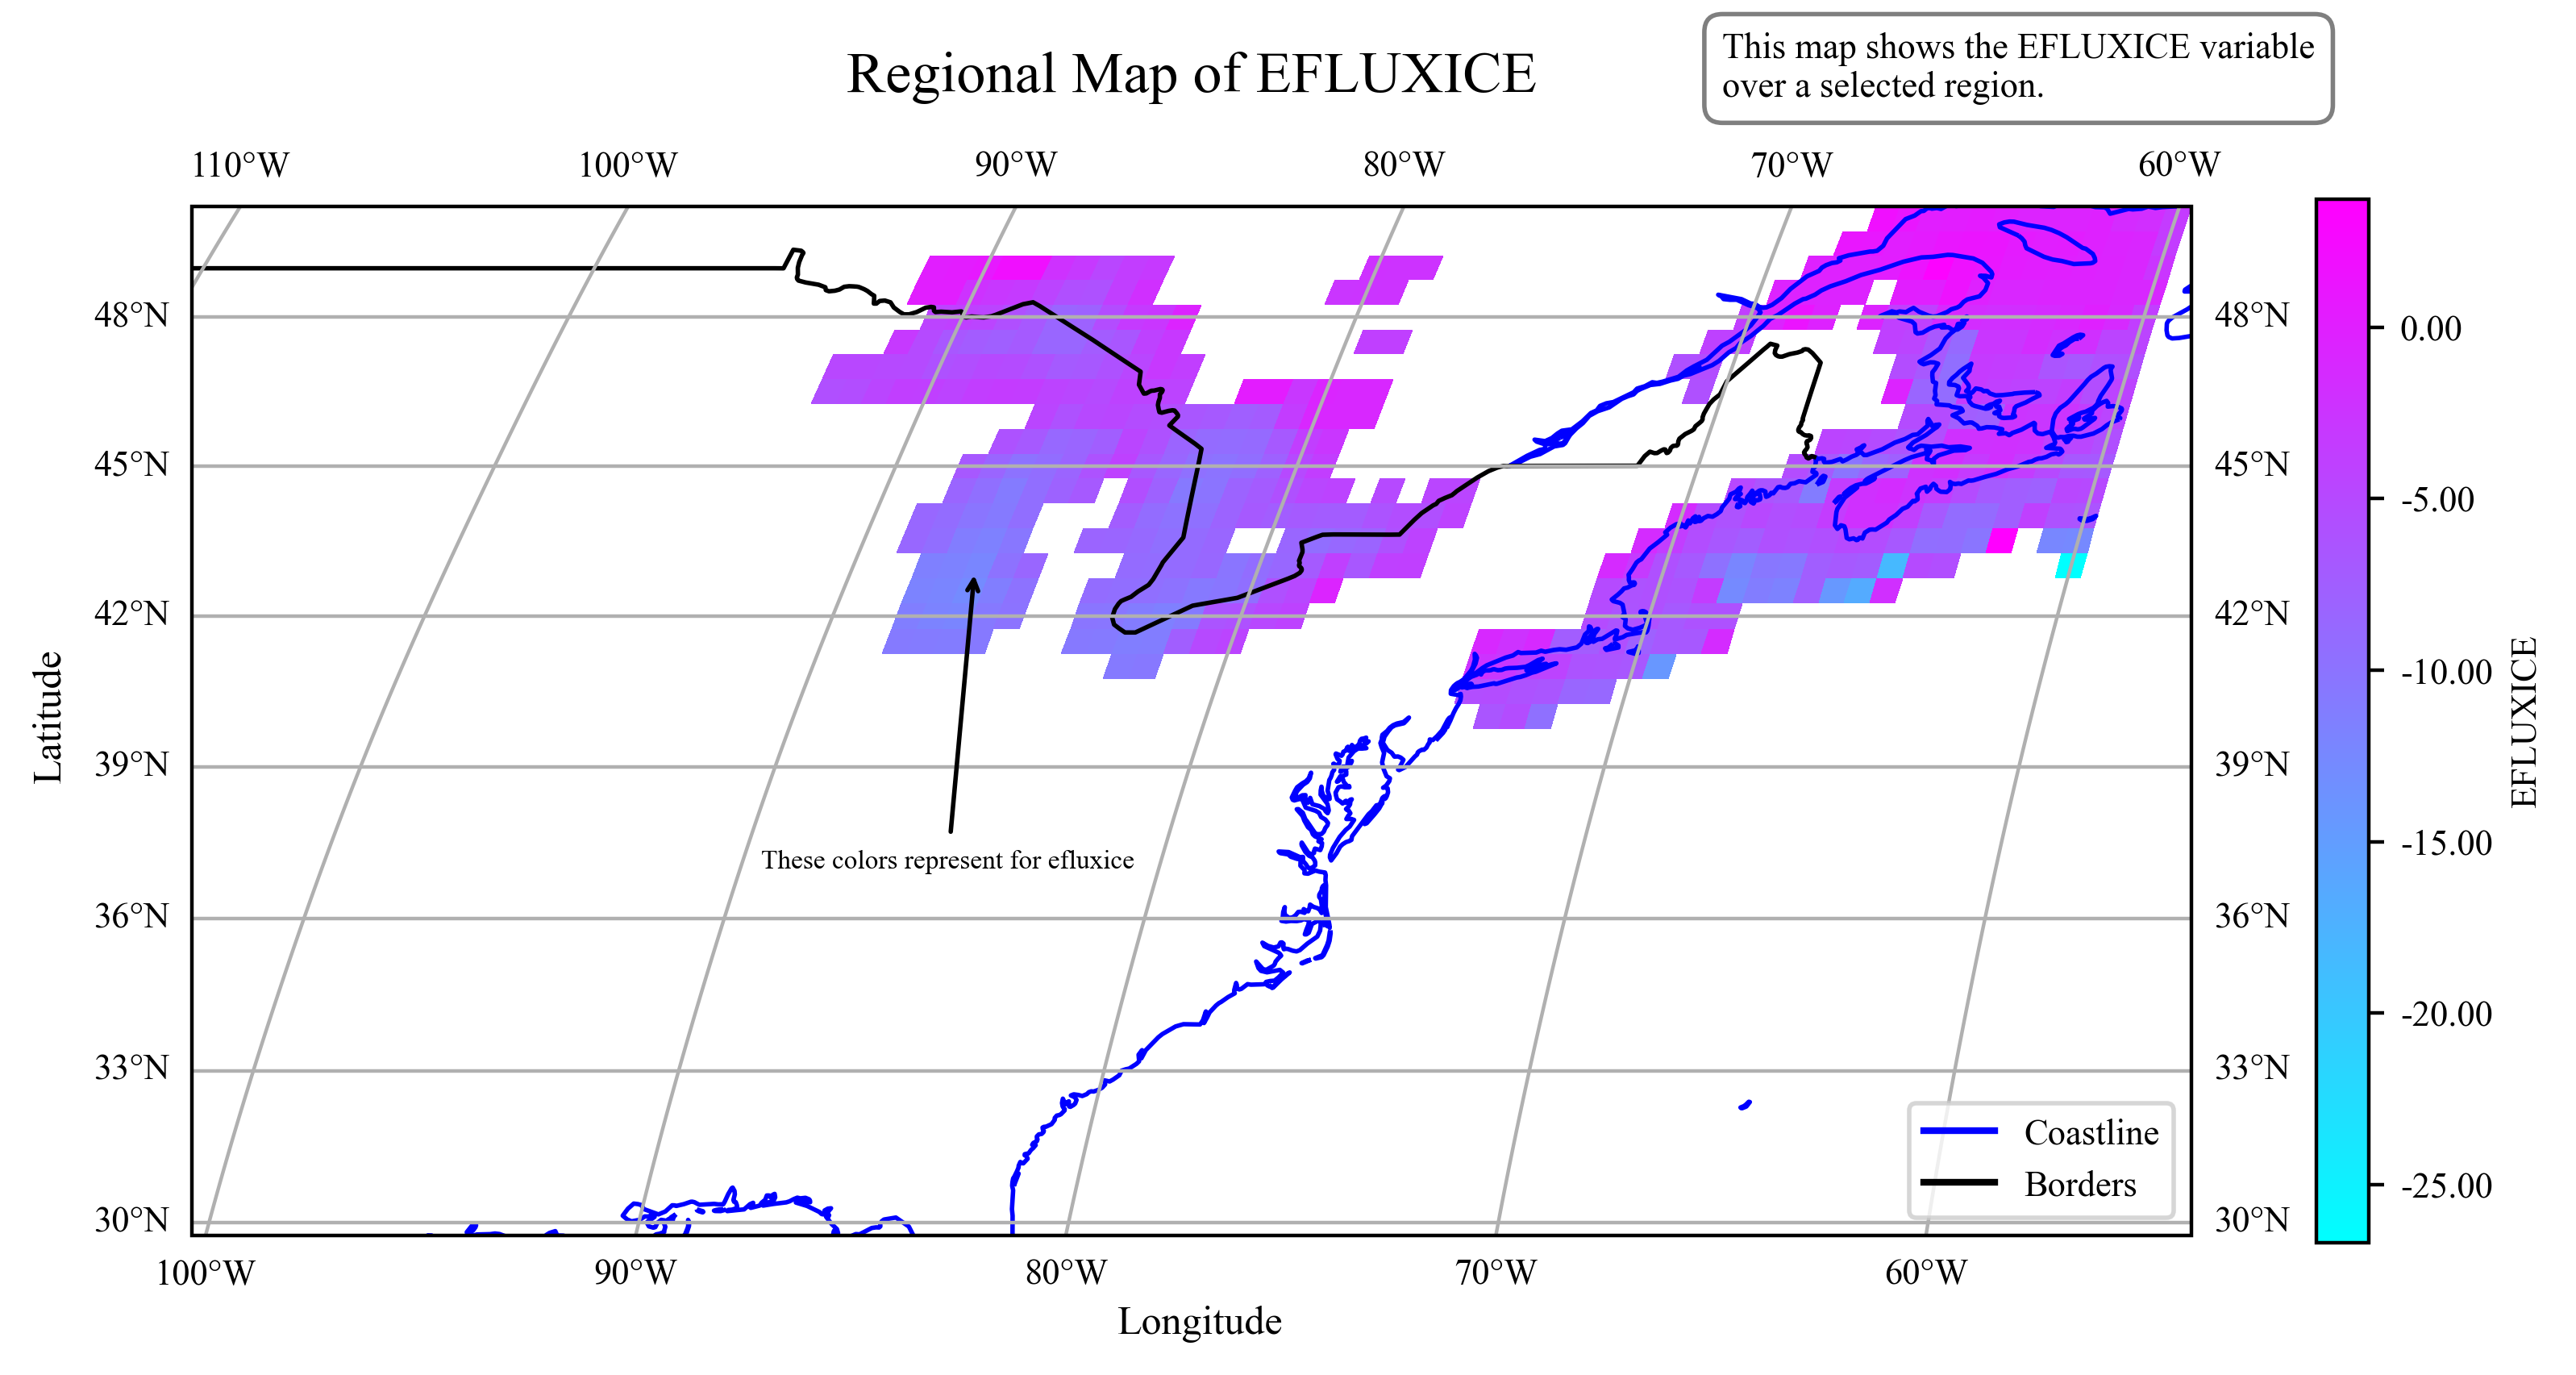

In [9]:
#2.2
#选择区域
efluxice_regional = glacier_data['EFLUXICE'].sel(lon=slice(-100, -60), lat=slice(30, 50)).mean(dim='time')

#创建画布和子图
fig = plt.figure(figsize=(10, 6), dpi=400)
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

#画图
regionnal_map = ax1.pcolormesh(efluxice_regional['lon'], efluxice_regional['lat'], efluxice_regional, transform=ccrs.PlateCarree(), cmap='cool')

#添加地图特征
ax1.add_feature(cfeature.COASTLINE, edgecolor='blue', label='Coastline')
ax1.add_feature(cfeature.BORDERS, edgecolor='black', label='Borders')

#添加网格线和刻度
gl1 = ax1.gridlines(draw_labels=True)
gl1.xlabel_style = {'size': 8, 'fontname': 'Times New Roman'}
gl1.ylabel_style = {'size': 8, 'fontname': 'Times New Roman'}

#设置坐标轴标题，因为cartopy没有自带坐标轴标题，所以要通过text函数来添加
ax1.text(-76.5, 28, 'Longitude', ha='center', va='center', fontsize=9, fontname='Times New Roman',transform=ccrs.PlateCarree())
ax1.text(-108, 40, 'Latitude', ha='center', va='center', rotation='vertical', fontsize=9, fontname='Times New Roman',transform=ccrs.PlateCarree())

#设置标题
ax1.set_title('Regional Map of EFLUXICE', fontsize=13, fontname='Times New Roman', pad=13)

#添加colorbar
cbar = fig.colorbar(regionnal_map, ax=ax1, shrink=0.7, pad=0.05)
cbar.set_label('EFLUXICE', fontsize=8, fontname='Times New Roman')

#设置 colorbar 的刻度标签的字体大小和字体样式
locations = cbar.ax.get_yticks()
cbar.ax.yaxis.set_major_locator(plt.FixedLocator(locations))
cbar.ax.set_yticklabels([f'{tick:.2f}' for tick in locations], fontsize=8, fontname='Times New Roman')

#添加注释，调整坐标系
ax1.annotate('These colors represent for efluxice', xy=(-87, 43),xytext=(-89.5, 37),xycoords=ccrs.PlateCarree(),arrowprops=dict(arrowstyle='->'),fontsize=6, fontname='Times New Roman')

# 添加文本框，确保文本框位置在当前视图范围内
text_box = "This map shows the EFLUXICE variable\nover a selected region."
ax1.text(-73, 52.5, text_box, fontsize=8, fontname='Times New Roman',bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'),transform=ccrs.PlateCarree())

#添加图例
plt.plot([], [], color='blue', label='Coastline')
plt.plot([], [], color='black', label='Borders')
plt.legend(loc='lower right', prop={'size': 8, 'family': 'Times New Roman'})

plt.show()
